<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN vs. K-Means

_Author: Katie Sylvia_
 
 In **Unsupervised Learning** we have different type of algorithms such as:
 
1. Clustering
2. PCA
2. Association Rules
3. Recommendation Engines


In **Clustering** we have talked about:
1. K-Means Clustering
2. DBSCAN Clustering

In this notebook, we will mainly discuss *DBSCAN Clustering*

As you recall from yesterday, there are some disadvantages in K-Means Clustering. Among them are that K-Means is sensitive to outliers and does not perform well with non-spherical shapes of clusters.
   
   To deal with this we have *Density Based Spatial Clustering (DBSCAN)*:
   
     - It is mainly used to find outliers and to deal with non-spherical data
     - Clustering is mainly done based on density of data points (where more number of data points are present).


In [1]:
# Something new to install...
#! pip install plotly

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Something new to import...
import plotly.express as px

# Imports from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

# Setting formatting of floats to be five places past the decimal
pd.options.display.float_format = '{:.5f}'.format

### I. Get Data Ready

In [3]:
# From Plotly, we'll import the Gapminder data
df = px.data.gapminder()

In [4]:
# Head
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.80100,8425333,779.44531,AFG,4
1,Afghanistan,Asia,1957,30.33200,9240934,820.85303,AFG,4
2,Afghanistan,Asia,1962,31.99700,10267083,853.10071,AFG,4
3,Afghanistan,Asia,1967,34.02000,11537966,836.19714,AFG,4
4,Afghanistan,Asia,1972,36.08800,13079460,739.98111,AFG,4


In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [6]:
# Nulls
df.isna().sum()

# There is no missing value.

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
iso_alpha    0
iso_num      0
dtype: int64

In [7]:
# find unique values in year column
df['year'].value_counts()

1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: year, dtype: int64

In [8]:
# Filter Data to Most Recent Year
df_2007 = df[df['year']==2007].copy()

In [9]:
# Set Country to Index
df_2007.set_index('country', inplace=True)

In [10]:
# Drop `iso_alpha`, `year`, and `iso_num`
df_2007.drop(columns=['iso_alpha', 'year', 'iso_num'], inplace=True)

In [11]:
# How many countries in each continent?
df_2007.groupby('continent')['pop'].count()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: pop, dtype: int64

In [12]:
# Get dummies!
df_dummies = pd.get_dummies(df_2007, columns=['continent'])

In [13]:
# Head (again!)
df_dummies.head()


,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
country,,,,,,,,
Afghanistan,43.82800,31889923,974.58034,0,0,1,0,0
Albania,76.42300,3600523,5937.02953,0,0,0,1,0
Algeria,72.30100,33333216,6223.36747,1,0,0,0,0
Angola,42.73100,12420476,4797.23127,1,0,0,0,0
Argentina,75.32000,40301927,12779.37964,0,1,0,0,0


In [14]:
# Define X

X = df_dummies.copy()

In [15]:
# Scale Features
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### II. K-Means Clustering Model

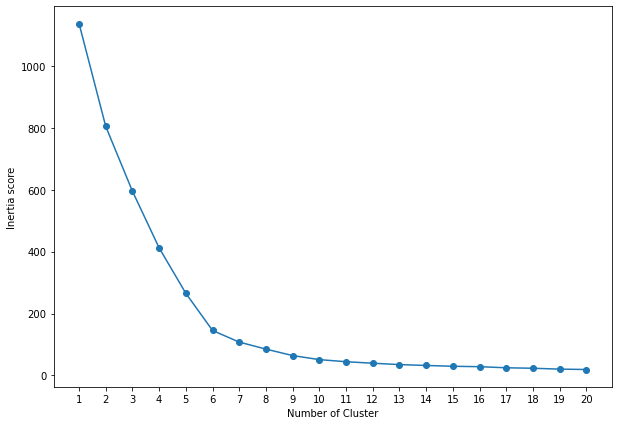

In [16]:
# Elbow Plot
plt.figure(figsize=(10, 7))
inertia_list = []

for k in range(1, 21):
    km = KMeans(n_clusters=k)
    km.fit(X_sc)
    inertia_list.append(km.inertia_)
    
plt.plot(range(1,21), inertia_list, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia score')
plt.xticks(range(1,21));

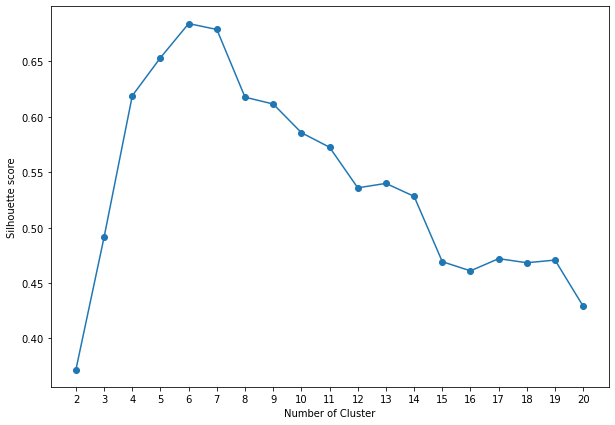

In [17]:
# Silhouette Score
plt.figure(figsize=(10, 7))
silhouette_list = []

for k in range(2, 21):
    km = KMeans(n_clusters=k)
    km.fit(X_sc)
    silhouette_list.append(silhouette_score(X_sc, km.labels_))
    
    
plt.plot(range(2,21), silhouette_list, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette score')
plt.xticks(range(2,21));

#### Based off of our metrics above, which k should we try first?

Answer Here:



In [18]:
# Now let's try it!

# Instantiate & Fit
km = KMeans(n_clusters=6)
km.fit(X_sc)

KMeans(n_clusters=6)

In [19]:
# Silhouette Score
silhouette_score(X_sc, km.labels_)

0.684136286873593

#### Visualize Your Clusters!

In [20]:
# Add cluster column
df_2007['cluster'] = km.labels_


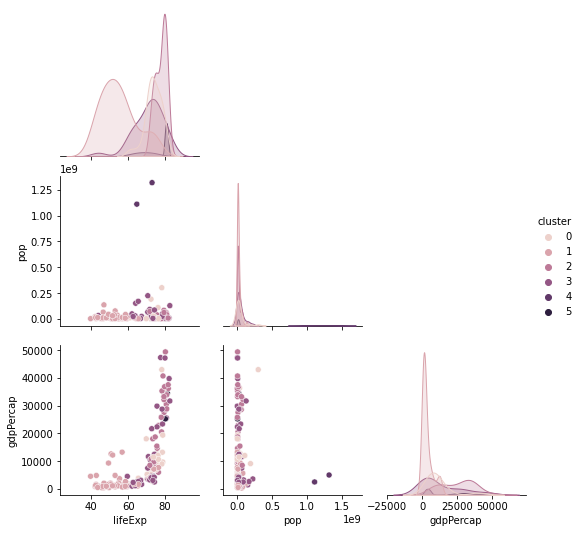

In [21]:
# Method 1: Pairplots/Scatterplots
sns.pairplot(df_2007, hue='cluster', corner=True);


In [22]:
# Method 2: Groupby
df_2007.groupby('continent')['cluster'].count()


continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: cluster, dtype: int64

#### An Even Closer Look...Which countries are in each of these clusters?

In [24]:
# For loop
for i in df_2007['cluster'].unique():
    print(f'Cluster number {i}', df_2007[df_2007['cluster'] == i].index)


Cluster number 3 Index(['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'Hong Kong, China',
       'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
       'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait', 'Lebanon', 'Malaysia',
       'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines',
       'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syria', 'Taiwan', 'Thailand',
       'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.'],
      dtype='object', name='country')
Cluster number 2 Index(['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
       'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom'],
      dtype='object', name='country')
Cluster number 1 Index(['Algeria', 'Angola', 'Be

### III. [In Groups] DBSCAN Clustering Model

- Try tuning your parameters
- Determine your best silhouette score
- Visualize your clusters
- Is this better or worse than KMeans?
- Which countries are in each cluster?

#### tuning your parameters

In [106]:
# create for loop for calculate the most score by tuning eps and min_samples
# instantiate dbscan and fit
dbscan_tuning = pd.DataFrame(columns=['eps', 'min_samples', 'score'])
dbscan_dummy = pd.DataFrame(columns=['eps', 'min_samples', 'score'])
for get, dis in enumerate(range(1, 7)):
    for dummy, n in enumerate(range(1, 7)):
        dbscan = DBSCAN(eps=dis, min_samples=n)
        dbscan.fit(X_sc)
        dbscan_dummy.loc[dummy] = [dis, n, silhouette_score(X_sc, dbscan.labels_)]
    dbscan_tuning = pd.concat([dbscan_tuning, dbscan_dummy])
dbscan_tuning.reset_index(drop=True, inplace=True)

#### best silhouette score

In [116]:
dbscan_tuning.sort_values('score', ascending=False).head(4)

,eps,min_samples,score
6,2.00000,1.00000,0.68414
7,2.00000,2.00000,0.68414
13,3.00000,2.00000,0.68414
12,3.00000,1.00000,0.68414


From table above has shown us that highest score of silhouette scores(68.41%) are combinations of 

eps|min_samples|
---|---|
2|1|
2|2|
3|1|
3|2|


#### Visualize your clusters

In [110]:
# create function dbscan for count clusters and plot pairplot
def high_dbscan(eps, min_sample):
    dbscan = DBSCAN(eps=eps, min_samples=min_sample)
    dbscan.fit(X_sc)
    df_2007['db_cluster'] = dbscan.labels_
    
    # count cluster in dbscan
    print(df_2007['db_cluster'].value_counts())
    sns.pairplot(df_2007, hue='db_cluster', corner = True, palette='viridis')

2    52
0    31
1    30
3    25
4     2
5     2
Name: db_cluster, dtype: int64


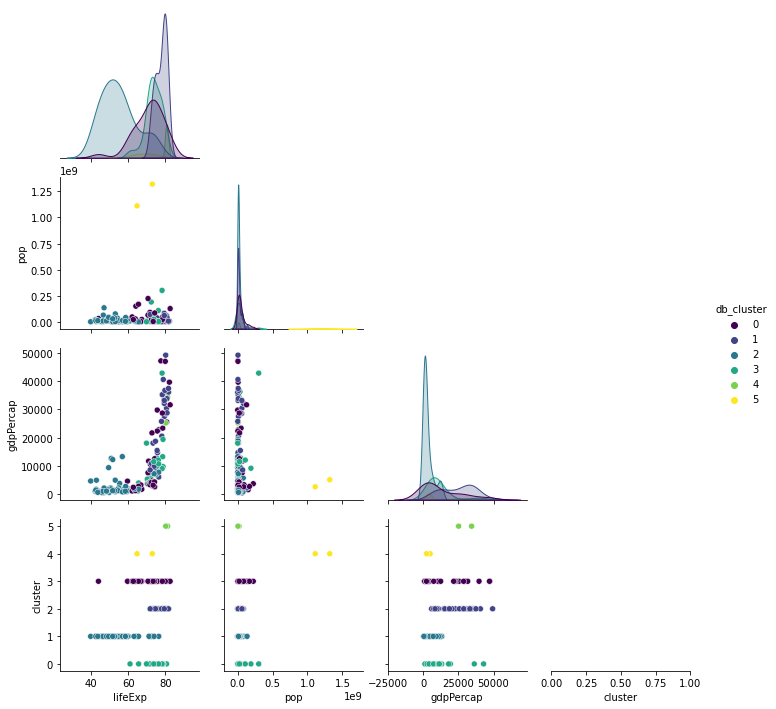

In [111]:
# eps = 2, min_sample = 1
high_dbscan(2, 1)

2    52
0    31
1    30
3    25
4     2
5     2
Name: db_cluster, dtype: int64


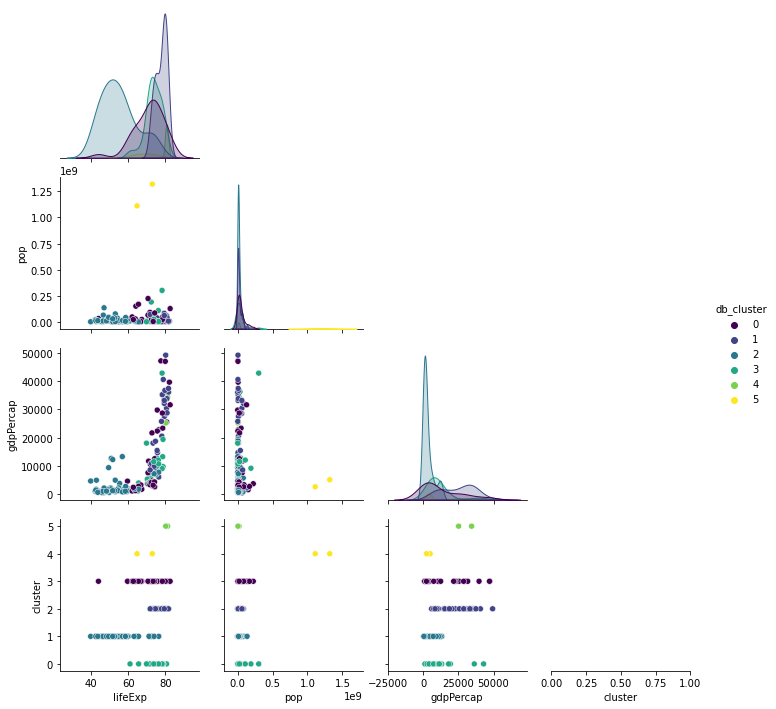

In [112]:
# eps = 2, min_sample = 2
high_dbscan(2, 2)

2    52
0    31
1    30
3    25
4     2
5     2
Name: db_cluster, dtype: int64


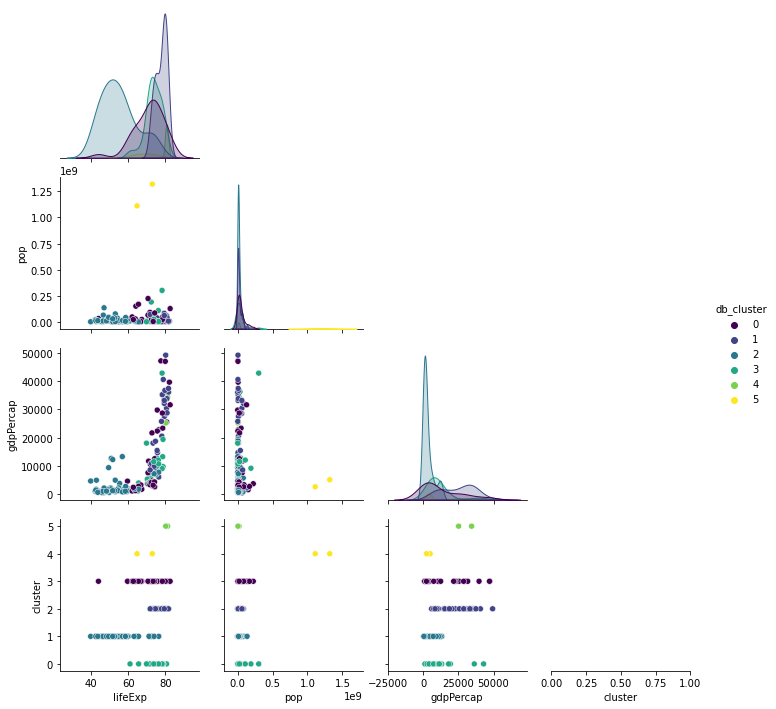

In [113]:
# eps = 3, min_sample = 1
high_dbscan(3, 1)

2    52
0    31
1    30
3    25
4     2
5     2
Name: db_cluster, dtype: int64


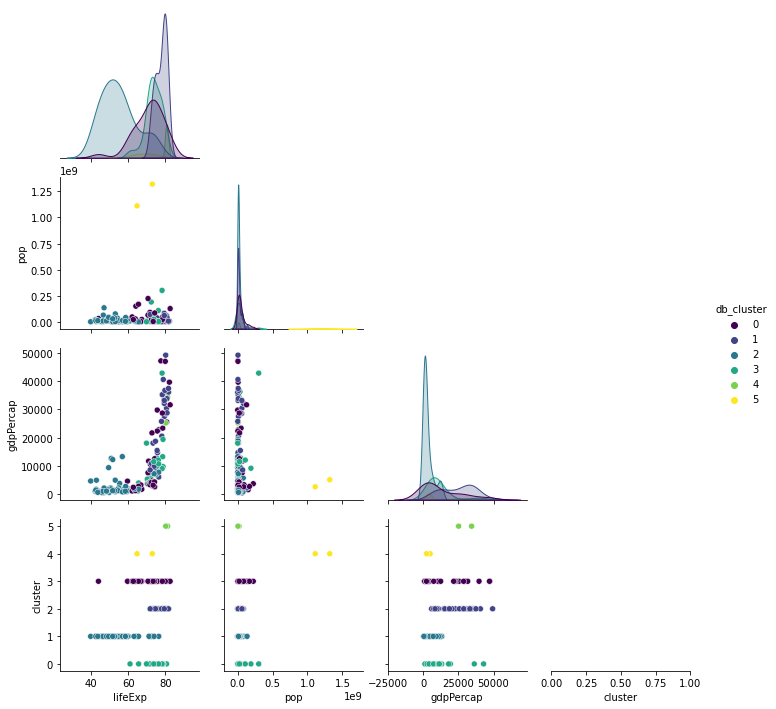

In [114]:
# eps = 3, min_sample = 2
high_dbscan(3, 2)

From all hyperparameter that we are already tuned that give the same number of clusters.

#### Is this better or worse than KMeans?

In [120]:
# Best score of Silhouette Score from kmeans
print('KMeans n_neighbor = 6')
print(silhouette_score(X_sc, km.labels_))
print('-------------------------------')
print('DBSCAN')
dbscan_tuning.sort_values('score', ascending=False).head(1)

KMeans n_neighbor = 6
0.684136286873593
-------------------------------
DBSCAN


,eps,min_samples,score
6,2.00000,1.00000,0.68414


My conclusion is from this data K_means with 6 neighbors and DBSCAN with eps 2, 3 and min_sample 1, 2 combinations perform the same.

#### countries are in each cluster

In [121]:
# For loop
for i in df_2007['db_cluster'].unique():
    print(f'Cluster number {i}', df_2007[df_2007['db_cluster'] == i].index)

Cluster number 0 Index(['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'Hong Kong, China',
       'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
       'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait', 'Lebanon', 'Malaysia',
       'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines',
       'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syria', 'Taiwan', 'Thailand',
       'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.'],
      dtype='object', name='country')
Cluster number 1 Index(['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
       'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom'],
      dtype='object', name='country')
Cluster number 2 Index(['Algeria', 'Angola', 'Be

### ⭐ There are pros & cons for both DBSCAN and K-Means Clustering Models. Again, since this is unsupervised it is not easy to know which method you should use until you dive into your data! Keep exploring and diving into your data 💫 